In [1]:
import pandas as pd
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
print(metro.head())
print(metro.tail())
print(metro.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

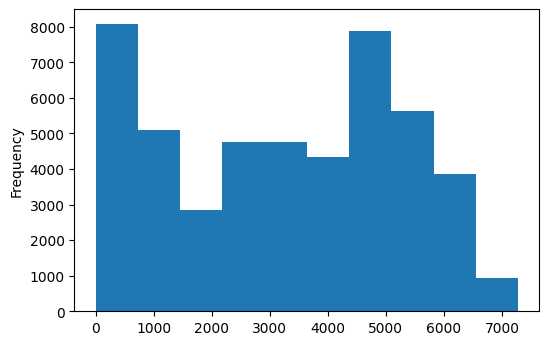

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

metro['traffic_volume'].plot.hist()
plt.show()

In [4]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
metro['traffic_volume']

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64

In [6]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [7]:
metro['hour'] = metro['date_time'].dt.hour.astype(int)

In [8]:
metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


In [9]:
metro['dayornight'] = None
metro.loc[(metro['hour']>=7) & (metro['hour'] < 19),'dayornight'] = 'Day'
metro.loc[metro['dayornight'].isna(),'dayornight'] = 'Night'

In [10]:
traffic = metro.loc[metro['dayornight']=='Day', ].copy()

In [11]:
traffic_night = metro.loc[metro['dayornight']=='Night',].copy()

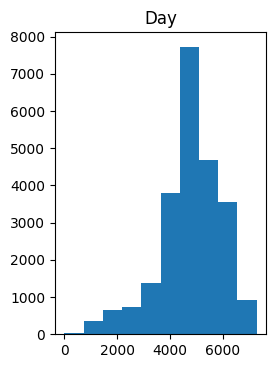

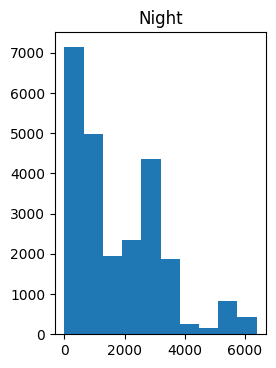

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.hist(traffic['traffic_volume'], bins=10)
plt.title('Day')
plt.show()
plt.subplot(1,2,2)
plt.hist(traffic_night['traffic_volume'], bins=10)
plt.title('Night')
plt.show()

In [13]:
print(traffic['traffic_volume'].describe())
print(traffic_night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [14]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

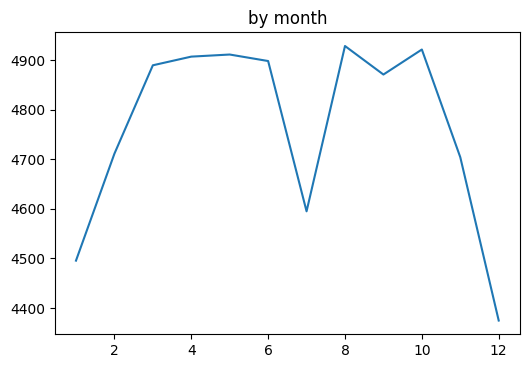

In [15]:
plt.plot(by_month['traffic_volume'])
plt.title('by month')
plt.show()

In [16]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_day = traffic.groupby('dayofweek').mean()
by_day['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

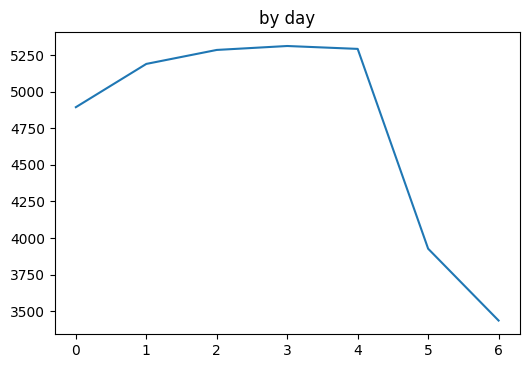

In [17]:
plt.plot(by_day['traffic_volume'])
plt.title('by day')
plt.show()

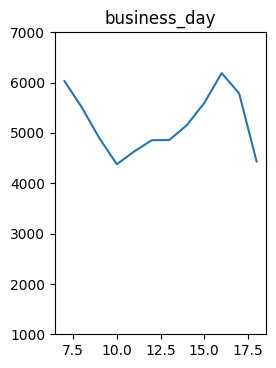

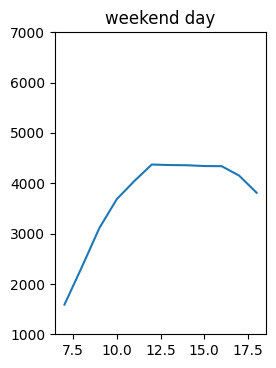

In [19]:
traffic['hour'] = traffic['date_time'].dt.hour
business_days = traffic.copy()[traffic['dayofweek'] <= 4]
weekend_days = traffic.copy()[traffic['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend_days.groupby('hour').mean()

plt.figure()
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('business_day')
plt.ylim(1000,7000)
plt.show()
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(1000,7000)
plt.title('weekend day')
plt.show()

In [20]:
traffic['temp'] = traffic['temp'].astype(float)

In [21]:
traffic[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']].corr()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000


In [22]:
by_weather_main = traffic.groupby('weather_main').mean()
by_weather_description = traffic.groupby('weather_description').mean()

In [23]:
by_weather_main.index

Index(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke',
       'Snow', 'Squall', 'Thunderstorm'],
      dtype='object', name='weather_main')

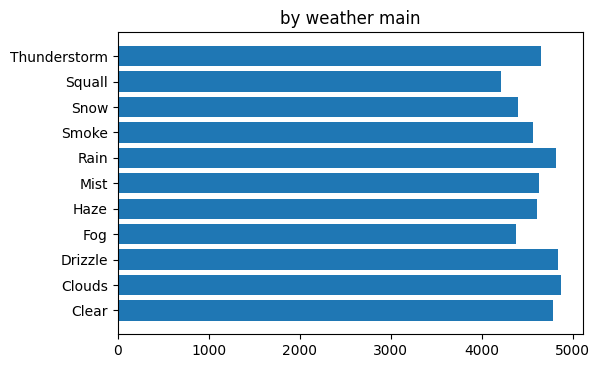

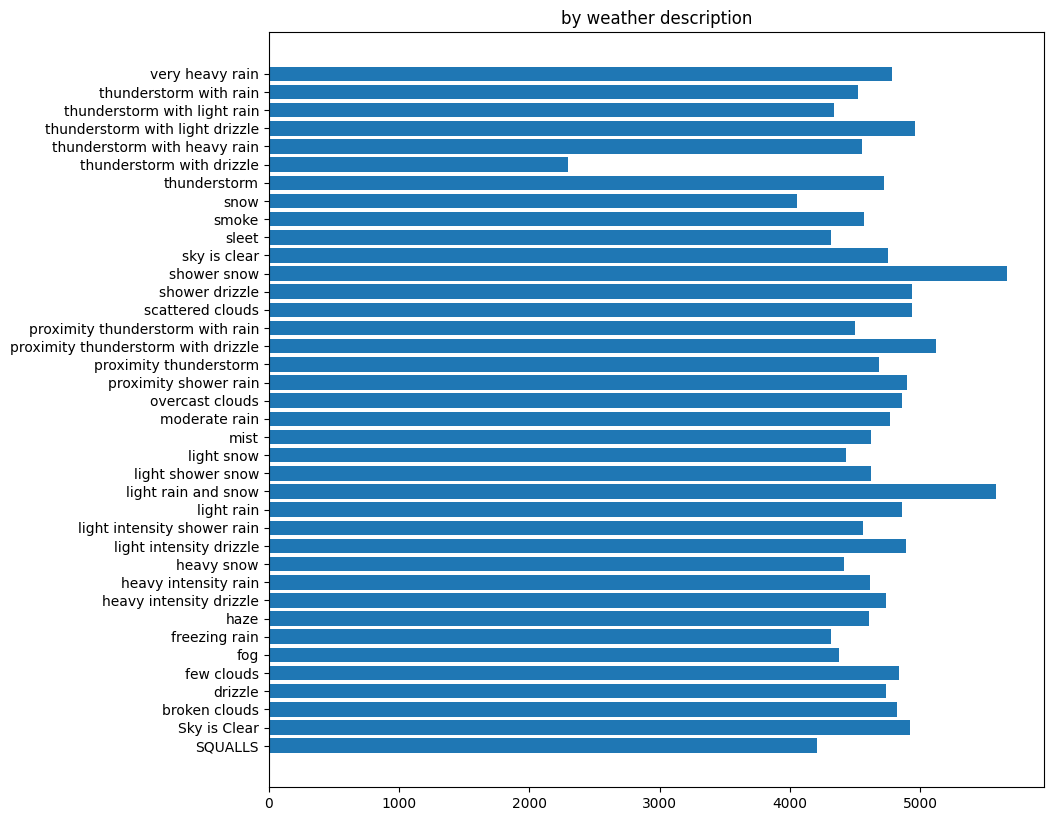

In [24]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.title('by weather main')
plt.show()
plt.figure(figsize=(10,10))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.title('by weather description')
plt.show()